<a href="https://colab.research.google.com/github/Rrrrabbit/Term3-2_2567/blob/main/INT624-Data_Mining/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Dataset**
Titanic dataset is from [kaggle](https://www.kaggle.com/c/titanic/data)

## Fill missing data

Reference:

https://www.datacamp.com/tutorial/manhattan-distance

https://stackoverflow.com/questions/62634025/manhattan-distance-between-2-vectors

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the preprocessed Titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/Rrrrabbit/Term3-2_2567/refs/heads/main/INT624-Data_Mining/train-normalized.csv')
# get column PassengerId into array pass_id
pass_id = df.PassengerId

In [ ]:
# Function to calculate Manhattan Distance
def manhattan_distance(row1, row2):
    return np.sum(np.abs(row1 - row2))

In [ ]:
# Fill null data in Age column

columns_if_null = ['Age']
columns_norm = ['NormFare', 'NormSibSp', 'NormParch', 'Pclass1', 'Pclass2', 'Pclass3','Sex male']

# Iterate through all rows with missing data
for column in columns_if_null:
    for idx, row in df[df[column].isnull()].iterrows():   #finding null field (NaN) in any column
        min_distance = float('inf')
        best_match_idx = None

        # Compare with all rows that have a known value for this column
        for idx2, row2 in df[df[column].notnull()].iterrows():
            # Calculate Manhattan Distance between the two rows (excluding the column we're filling)
            dist = manhattan_distance(
                row[columns_norm], row2[columns_norm])
            #print(idx2)
            if dist < min_distance:
                min_distance = dist
                best_match_idx = idx2

# Fill the missing value for the column with the best match's value
        df.at[idx, column] = df.at[best_match_idx, column]
print("Fin")
# Save the updated dataset
df.to_csv("/content/updated_titanic_data.csv", index=False)

Fin


## Correlation Heatmap

Reference:

https://stackoverflow.com/questions/50915906/pandas-dataframe-apply-to-dtype-generates-unexpected-results

https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/

https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#df = sns.load_dataset("titanic") //seaborn dataset

df = pd.read_csv("https://raw.githubusercontent.com/Rrrrabbit/Term3-2_2567/refs/heads/main/INT624-Data_Mining/updated_titanic_data-remove.csv")

# Select only some columns
selected_columns = ["Pclass", "Sex", "NormAge", "NormSibSp", "NormParch", "NormFare", "Embarked", "Survived"]

df = df[selected_columns]

In [ ]:
# Convert nominal data to numeric data
df = df.apply(lambda x: pd.factorize(x)[0] if x.dtype == 'object' else x)

# sex: male = 0, female = 1
# embarked: S = 0, C = 1, Q = 2

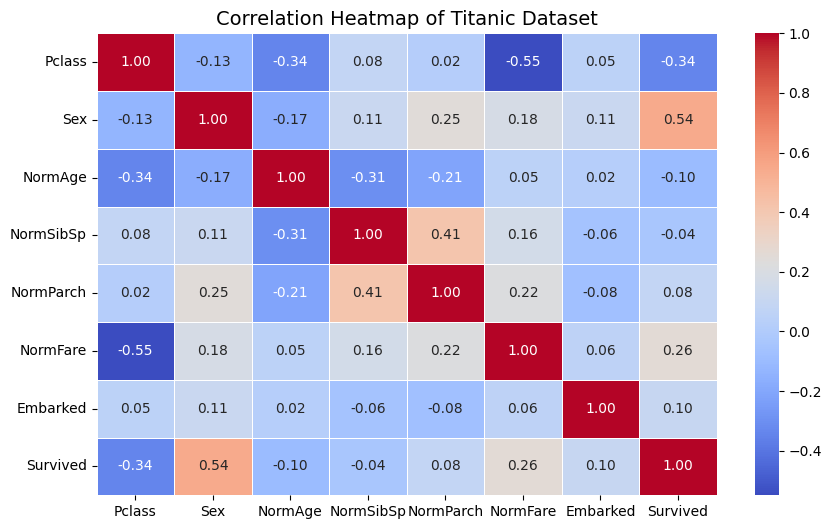

In [ ]:
# Correlation Matrix
corr_matrix = df.corr()

# Create Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Titanic Dataset", fontsize=14)
plt.show()

## Density Heatmap

Reference:

https://plotly.com/python/2D-Histogram/

https://seaborn.pydata.org/generated/seaborn.heatmap.html

https://pandas.pydata.org/docs/

https://matplotlib.org/stable/users/explain/quick_start.html

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# https://plotly.com/python/2D-Histogram/

import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/Rrrrabbit/Term3-2_2567/refs/heads/main/INT624-Data_Mining/updated_titanic_data.csv")
selected_columns = ["Age","Pclass", "SibSp", "Parch", "Survived","Sex","Fare"]
df = df[selected_columns]

fig = px.density_heatmap(df, x="Age", y="Pclass", facet_row="Sex", text_auto=True,
                         title="Density Heatmap mapped by Gender, Age, Pclass and Survived")
fig.show()

fig = px.density_heatmap(df, x="Fare", y="Pclass", text_auto=True,
                         title="Density Heatmap mapped by Gender, Parch, SibSp and Survived")
fig.show()

<ipython-input-32-00c8846f553a>:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



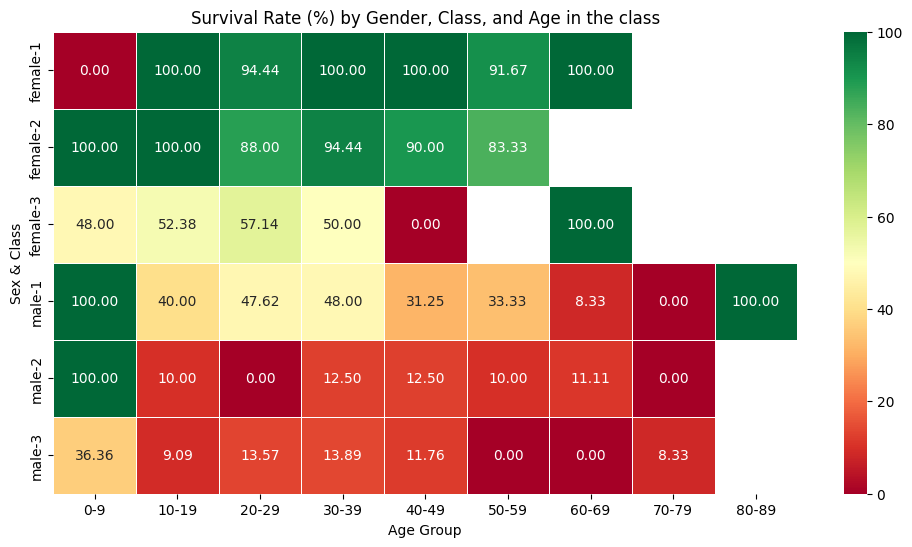

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
# https://pandas.pydata.org/docs/
# https://matplotlib.org/stable/users/explain/quick_start.html

# mean()
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.mean.html
# unstack()
# https://www.geeksforgeeks.org/pandas-groupby-unstack/

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/updated_titanic_data.csv")
selected_columns = ["Age","Pclass", "SibSp", "Parch", "Survived","Sex","Fare"]
df = df[selected_columns]

# Age range
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels)

# Sum survival passengers
#survival_rate = df.groupby(["Sex", "Pclass", "AgeGroup"])["Survived"].sum().unstack()

# Survival rate in same passenger class
survival_rate = df.groupby(["Sex", "Pclass", "AgeGroup"])["Survived"].mean().unstack() * 100

# Survival rate in all passengers
#survival_rate = df.groupby(["Sex", "Pclass", "AgeGroup"])["Survived"].sum().unstack()
#survival_rate = (survival_rate/891)*100

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(survival_rate, annot=True, fmt=".2f", cmap="RdYlGn", linewidths=0.5)

plt.title("Survival Rate (%) by Gender, Class, and Age in the class")
plt.xlabel("Age Group")
plt.ylabel("Sex & Class")
plt.show()